# ***Stack Overflow Annual Developer Survey 2024***




# ***Business understanding***

The tech industry is evolving rapidly, and understanding the factors that influence developer success is crucial for companies, educators, and developers themselves. This project explores insights from the Stack Overflow Developer Survey 2024 to answer key questions about salaries, education, job search behavior, and popular technologies. By analyzing these patterns, we aim to identify what makes developers thrive in today’s competitive market.



# ***Download the Datasets***

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("berkayalan/stack-overflow-annual-developer-survey-2024")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/stack-overflow-annual-developer-survey-2024


# ***Import library***

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

### ***Read Data***

In [7]:
df = pd.read_csv(path + "/survey_results_public.csv")

# ***Data Understanding***

In [8]:
 df.shape

(65437, 114)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [10]:
df.index

RangeIndex(start=0, stop=65437, step=1)

In [11]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [12]:
df['Age'].value_counts(dropna = False)

,count
Age,
25-34 years old,23911
35-44 years old,14942
18-24 years old,14098
45-54 years old,6249
55-64 years old,2575
Under 18 years old,2568
65 years or older,772
Prefer not to say,322


Most of the participants are between 25-34 years old, while there are 322 who prefer not to say.

In [13]:
df['EdLevel'].value_counts(dropna=False)

,count
EdLevel,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24942
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15557
Some college/university study without earning a degree,7651
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",5793
NaN,4653
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2970
"Associate degree (A.A., A.S., etc.)",1793
Primary/elementary school,1146
Something else,932


Most of those with a bachelor's degree have about 4653 outliers.

In [14]:
df['ConvertedCompYearly'].value_counts(dropna=False)

,count
ConvertedCompYearly,
NaN,42002
64444.0,321
53703.0,308
75184.0,230
85925.0,226
107406.0,208
150000.0,207
120000.0,203
200000.0,196


In [15]:
df['ConvertedCompYearly'].describe()

,ConvertedCompYearly
count,2.343500e+04
mean,8.615529e+04
std,1.867570e+05
min,1.000000e+00
25%,3.271200e+04
50%,6.500000e+04
75%,1.079715e+05
max,1.625660e+07


# ***📈 Exploratory Data Analysis (EDA)***

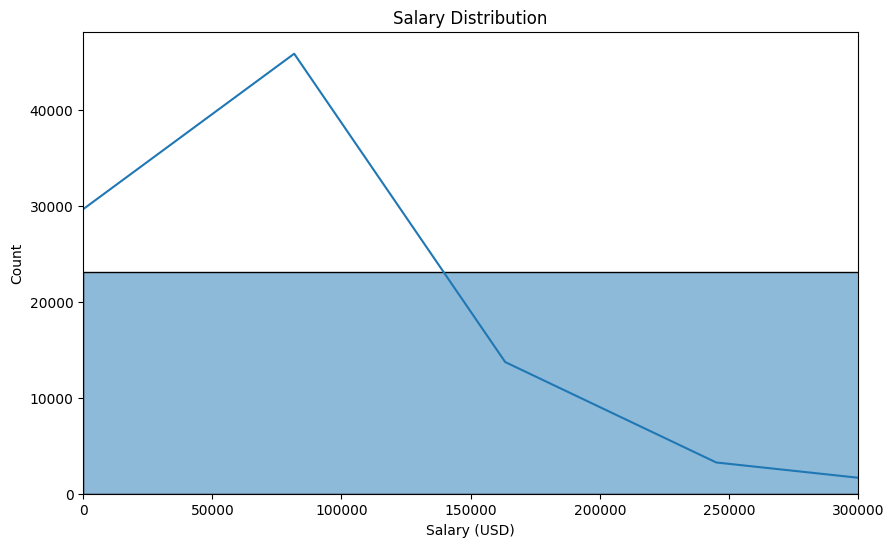

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')
plt.xlim(0, 300000)
plt.show()

The highest salaries are between 100,000 and 50,000.

<ipython-input-17-8359bd316b02>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


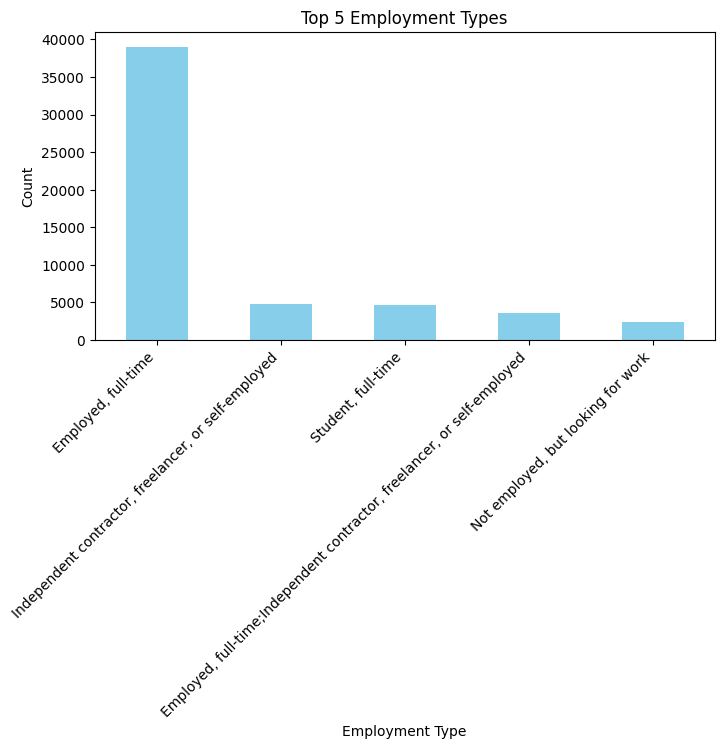

In [17]:
top5 = df['Employment'].value_counts().nlargest(5)
top5.plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title("Top 5 Employment Types")
plt.ylabel("Count")
plt.xlabel("Employment Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-18-36501740eb27>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Age'], palette='viridis')


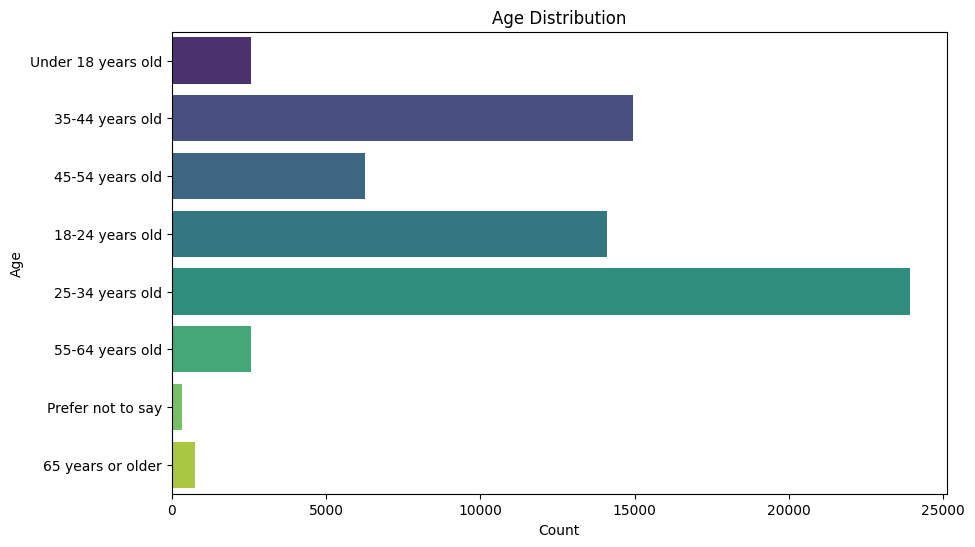

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['Age'], palette='viridis')
plt.title('Age Distribution')
plt.ylabel('Age')
plt.xlabel('Count')
plt.show()

# **Which education levels are most common among professional developers?**

<ipython-input-19-4b04e49327de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['EdLevel'], palette='viridis')


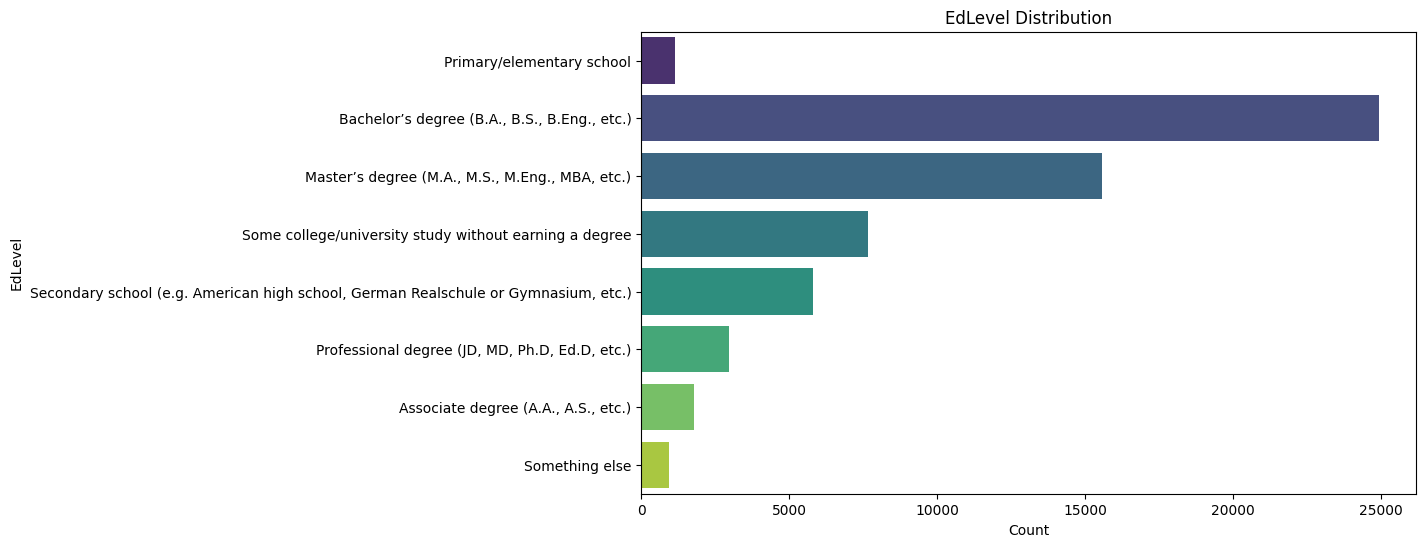

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['EdLevel'], palette='viridis')
plt.title('EdLevel Distribution')
plt.ylabel('EdLevel')
plt.xlabel('Count')
plt.show()

# **Which programming languages are most frequently used by developers?**



<ipython-input-20-24a263e9dde0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_langs.values()), y=list(top_langs.keys()), palette='viridis')


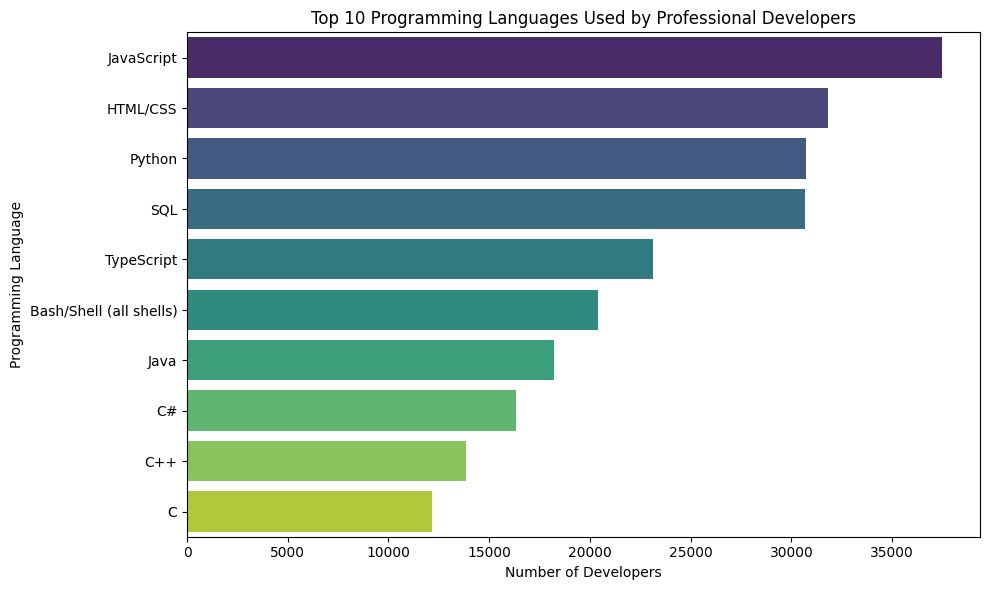

In [20]:
from collections import Counter

all_langs = df['LanguageHaveWorkedWith'].dropna().str.split(';').sum()
lang_counts = Counter(all_langs)
top_langs = dict(lang_counts.most_common(10))

plt.figure(figsize=(10,6))
sns.barplot(x=list(top_langs.values()), y=list(top_langs.keys()), palette='viridis')
plt.title("Top 10 Programming Languages Used by Professional Developers")
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.tight_layout()
plt.show()

# **How does job search time vary by education level?**

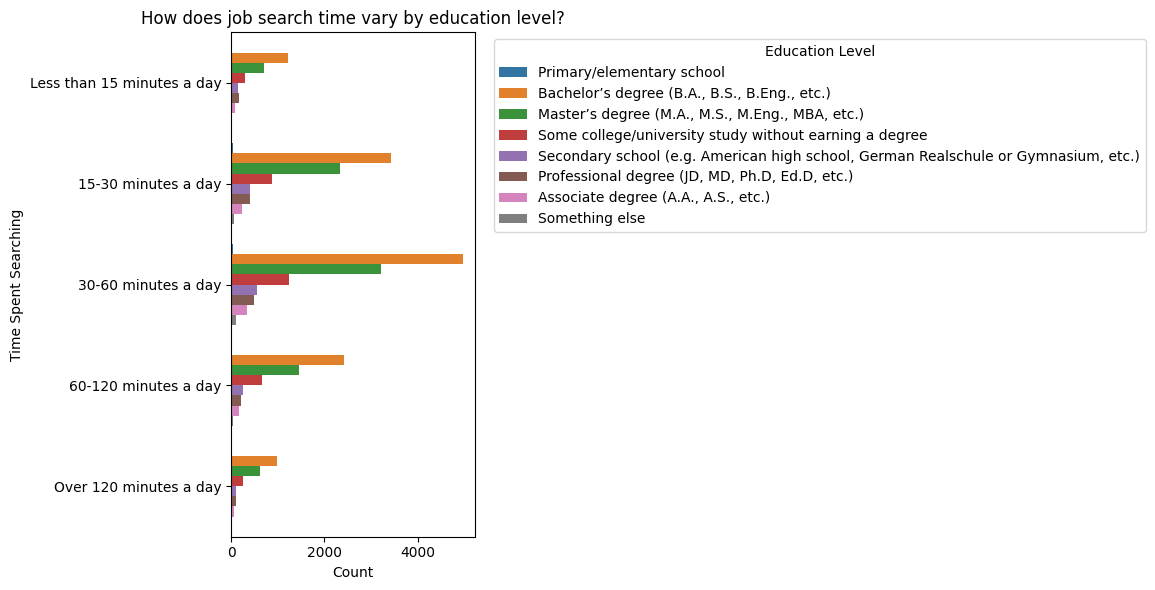

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='TimeSearching', hue='EdLevel', order=[
    'Less than 15 minutes a day',
    '15-30 minutes a day',
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day'
])
plt.title("How does job search time vary by education level?")
plt.xlabel("Count")
plt.ylabel("Time Spent Searching")
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-22-2b17773b5ef3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_per_lang.values, y=avg_salary_per_lang.index, palette='mako')


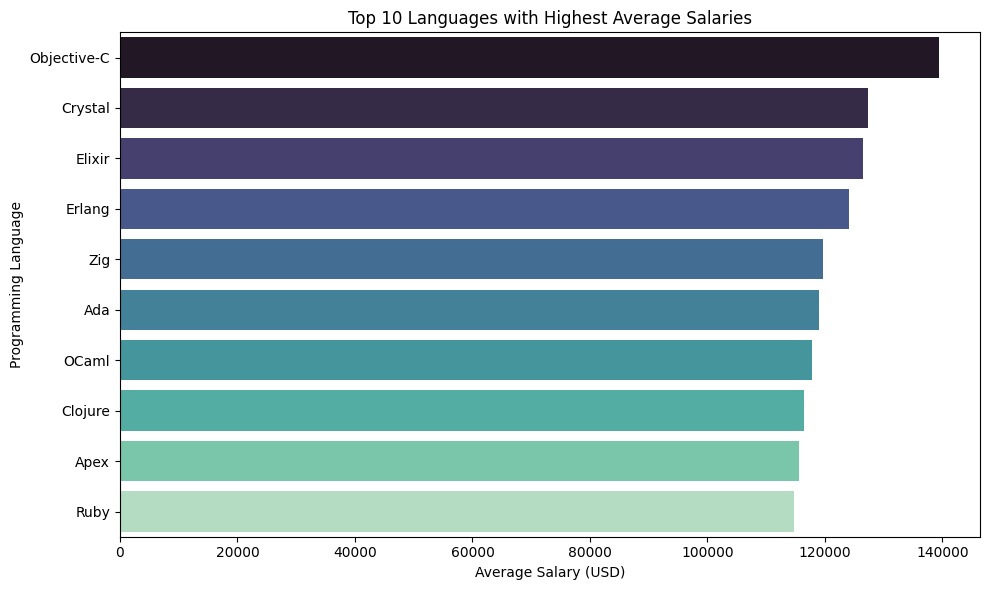

In [22]:
df_lang_salary = df[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna()


df_lang_salary['Language'] = df_lang_salary['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_lang_salary.explode('Language')


avg_salary_per_lang = df_exploded.groupby('Language')['ConvertedCompYearly'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_per_lang.values, y=avg_salary_per_lang.index, palette='mako')
plt.title("Top 10 Languages with Highest Average Salaries")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Programming Language")
plt.tight_layout()
plt.show()

# ***🛠️ Data Cleaning & Preprocessing***

In [23]:
#We ensure that the data does not contain missing values.
missing_values = df.isnull().sum()
print(missing_values)

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmired                   14565


In [25]:
df['RemoteWork'].value_counts(dropna=False)

,count
RemoteWork,
"Hybrid (some remote, some in-person)",23015
Remote,20831
In-person,10960
NaN,10631


In [26]:
most_frequent = df['RemoteWork'].mode()[0]
df['RemoteWork'].fillna(most_frequent, inplace=True)

<ipython-input-26-12d42003f6aa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(most_frequent, inplace=True)


In [27]:
df['RemoteWork'].value_counts(dropna=False)

,count
RemoteWork,
"Hybrid (some remote, some in-person)",33646
Remote,20831
In-person,10960


In [28]:
df = df[df["ConvertedCompYearly"].notnull()]

In [29]:
df['Country'].value_counts(dropna=False)

,count
Country,
United States of America,4677
Germany,2046
Ukraine,1474
United Kingdom of Great Britain and Northern Ireland,1391
India,1037
France,918
Canada,871
Brazil,685
Poland,586


In [30]:
df['Country'].isna().sum()

np.int64(0)

In [31]:
df['Country'] = df['Country'].str.strip().str.lower()

In [32]:
df['Country'] = df['Country'].str.replace(r'[^\w\s]', '', regex=True)

In [33]:
df['Country'] = df['Country'].replace({'united states': 'united states of america', 'usa': 'united states of america'})

In [34]:
print(df['Country'].value_counts())

Country
united states of america                                4677
germany                                                 2046
ukraine                                                 1474
united kingdom of great britain and northern ireland    1391
india                                                   1037
france                                                   918
canada                                                   871
brazil                                                   685
poland                                                   586
netherlands                                              561
spain                                                    559
italy                                                    540
australia                                                510
sweden                                                   457
switzerland                                              386
austria                                                  344
czech republic  

In [35]:
top_countries = df['Country'].value_counts().nlargest(10).index

df['Country'] = df['Country'].apply(lambda x: x if x in top_countries else 'other')

print(df['Country'].value_counts())

Country
other                                                   9189
united states of america                                4677
germany                                                 2046
ukraine                                                 1474
united kingdom of great britain and northern ireland    1391
india                                                   1037
france                                                   918
canada                                                   871
brazil                                                   685
poland                                                   586
netherlands                                              561
Name: count, dtype: int64


In [36]:
df['YearsCodePro'].value_counts(dropna=False)

,count
YearsCodePro,
3,1929
2,1812
5,1749
4,1563
10,1541
6,1466
8,1291
7,1247
1,972


In [37]:
most_common_value = df['YearsCodePro'].mode()[0]
df['YearsCodePro'].fillna(most_common_value, inplace=True)

<ipython-input-37-1e21fbafdf65>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].fillna(most_common_value, inplace=True)


In [38]:
selected_cols = ['Age', 'YearsCodePro', 'EdLevel', 'Employment', 'RemoteWork', 'ConvertedCompYearly']
df = df[selected_cols].copy()

In [39]:
df = pd.get_dummies(df, drop_first=True)

## ***📊 Splitting the dataset into training and testing sets***


In [40]:
X = df.drop('ConvertedCompYearly', axis=1)
y = df['ConvertedCompYearly']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ***🔧 Feature Scaling using StandardScaler***

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ***🧠 Building the Machine Learning Model***


In [43]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:,.2f}")

Linear Regression MSE: 8,961,383,881.37


In [44]:
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 94,664.59
R² Score: 0.0441


# ***Conclusion***

📌 Summary & Conclusion:
The Linear Regression model showed poor performance:

RMSE: 94,664.59

R² Score: 0.0441

This indicates the model explains only 4.4% of the variance in annual salary, suggesting a weak fit.

🔧 Future Improvements:
Apply log transformation to the target (ConvertedCompYearly)

Remove outliers (e.g., salaries > 300,000)

Use more advanced models like Random Forest or XGBoost

Perform feature engineering and feature selection

Ensure clean and well-preprocessed data